In [2]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from typing import Iterable, List
from timeit import default_timer as timer

import torch
import torch.nn as nn
from torch.nn import Transformer
from torch import Tensor

In [3]:
import h5py
filename = "GW2_Andy.h5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['background', 'binaryblackhole', 'ccsn', 'glitch']>
<class 'h5py._hl.dataset.Dataset'>


In [4]:
data_tensor = torch.from_numpy(ds_arr)
np.shape(ds_arr)

(2048, 2, 4096)

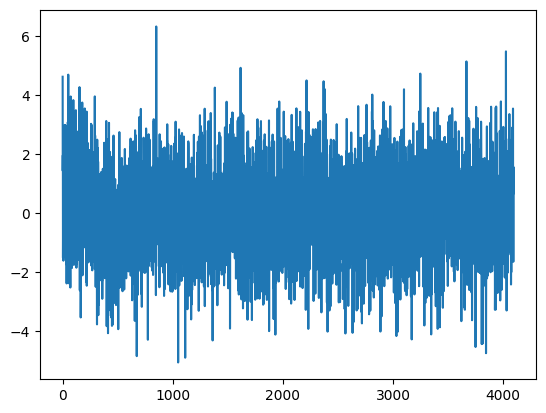

In [5]:
plt.plot(np.arange(0,len(ds_arr[0][0])),ds_arr[1][0] - ds_arr[0][0])

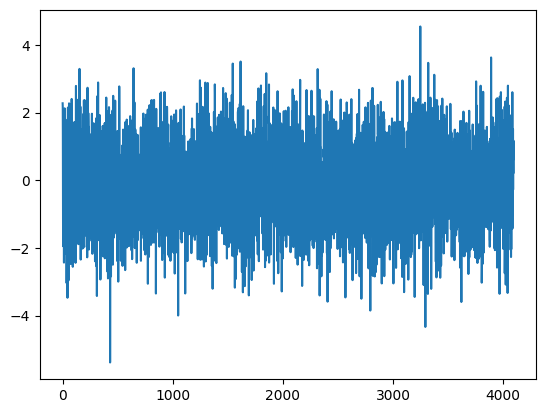

In [6]:
plt.plot(np.arange(0,len(ds_arr[1][0])),ds_arr[1][0])

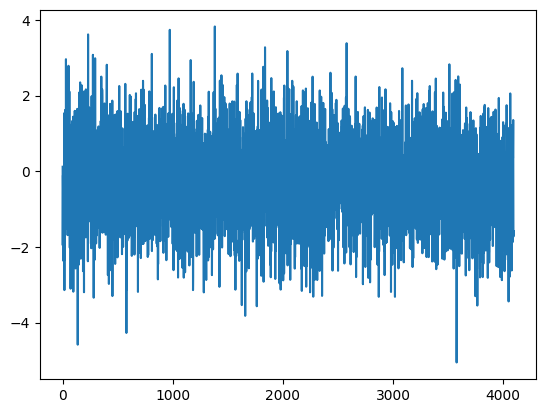

In [7]:
plt.plot(np.arange(0,len(ds_arr[2][0])),ds_arr[2][0])

In [8]:
print(ds_arr)

[[[-2.36111164e+00  7.21380293e-01 -6.13836110e-01 ...  2.25124502e+00
   -4.04606789e-01 -4.69980180e-01]
  [ 1.06444807e+01 -1.72870532e-01 -1.06695023e+01 ... -1.65614855e+00
    8.97330821e-01 -6.90784007e-02]]

 [[ 2.27243161e+00  2.16668367e+00  1.35501695e+00 ...  6.09749973e-01
    1.16850436e+00  2.26950288e-01]
  [-3.99193734e-01 -1.24130595e+00 -2.02182221e+00 ... -1.14877510e+00
   -1.49604893e+00 -1.57088113e+00]]

 [[ 1.21105827e-01 -1.95401633e+00 -7.64879048e-01 ... -9.39062476e-01
   -1.72557151e+00 -1.58127356e+00]
  [-2.07831287e+00 -2.49368921e-01  1.02514029e+00 ... -4.23581511e-01
    3.22839260e-01  1.82009816e+00]]

 ...

 [[ 8.09981227e-01  4.92054373e-01  1.19995940e+00 ...  2.63245797e+00
    1.50693965e+00 -6.35968149e-01]
  [ 1.89801902e-01  6.60186037e-02  1.00863185e-02 ...  7.96887457e-01
    1.21586359e+00  2.63555622e+00]]

 [[ 1.33424044e+00  4.50402260e-01 -1.57483798e-02 ...  3.39321584e-01
   -1.18939507e+00  2.23133668e-01]
  [ 4.98443723e-01  2.4

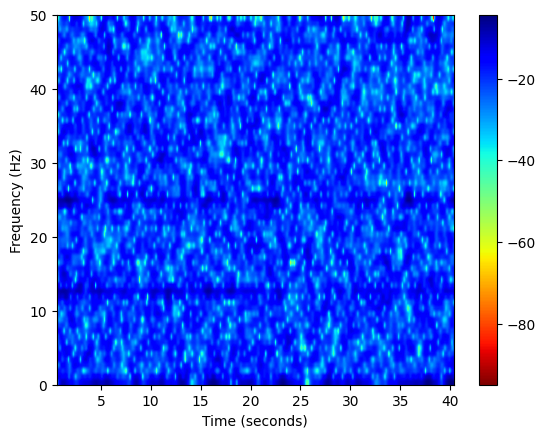

In [9]:
dt = 0.01               #Sampling interval of 0.01 seconds.

x = ds_arr[2][0] #- ds_arr[0][0]

plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120, cmap='jet_r', mode = 'magnitude')

plt.colorbar(); plt.xlabel("Time (seconds)"); plt.ylabel("Frequency (Hz)")
plt.show()


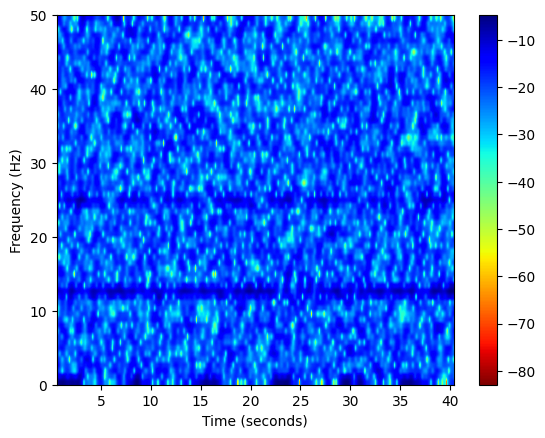

In [10]:
dt = 0.01               #Sampling interval of 0.01 seconds.

x = ds_arr[0][0] #- ds_arr[0][0]

plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120, cmap='jet_r', mode = 'magnitude')

plt.colorbar(); plt.xlabel("Time (seconds)"); plt.ylabel("Frequency (Hz)")
plt.show()
